# Homework 3

In [62]:
import math

def euclidean_distance(v, w):
    """Returns the Euclidean distance between two vectors"""

    return math.sqrt(sum([(v[ii]-w[ii])**2 for ii in range(len(v))]))

def euclidean_distances(X, Y):
    """Compute pairwise Euclidean distance between the rows of two matrices X (shape MxK) 
    and Y (shape NxK). The output of this function is a matrix of shape MxN containing
    the Euclidean distance between two rows.
    
    Arguments:
        X {np.ndarray} -- First matrix, containing M examples with K features each.
        Y {np.ndarray} -- Second matrix, containing N examples with K features each.

    Returns:
        D {np.ndarray}: MxN matrix with Euclidean distances between rows of X and rows of Y.
    """
    
    result = np.ndarray((X.shape[0], Y.shape[0]))
    
    for ii in range(X.shape[0]):
        for kk in range(Y.shape[0]):
            
            result[ii,kk] = euclidean_distance(X[ii], Y[kk])
    
    return result


def update_assignments(features, means):
    """
    Takes features & means and returns label assignments 

    Args:
        features (np.ndarray): data that needs labels
        means (np.ndarray): # of rows equal to number of means; 
                            # of columns equal to # of columns of feature
                            i.e. dimensionality is the same

    Returns:
        labels (np.ndarray): array of labels based on which cluster mean is closes
            Has length equal to number of rows in features i.e. one label per feature
    """

    # First, calculate distances between features and means
    # A row are all the distances between a given feature and all the means
    # A column are all the distances between a mean and all the features
    distances = euclidean_distances(features, means)
    # the dimensions of distances are:
    # rows = number of rows in features
    # columns = number of means i.e. number of clusters we are looking for

    # Then, we label each feature based on the mean that's closest to it
    # The below gives the index at each row where the minimum value is found in that row
    feature_labels = np.argmin(distances, axis=1)

    return feature_labels

def update_means(features, feature_label, n_means):
    """
    Takes features & their labels and returns the means for each label class

    Args:
        features (np.ndarray): dataset to determine new means
        feature_labels (np.ndarray): 1D array with the labels for the features
        n_means (int): number of means to find. Should be equal to n_clusters

    Returns:
        new_means (np.ndarray): 
            # of rows = number of means
            # of columns = dimensionality of features
    """

    new_means = []

    for label in range(n_means):

        new_means.append(np.mean(features[feature_labels==label], axis=0))
    
    return np.array(new_means)


In [5]:
import numpy as np
from sklearn.datasets import make_blobs

def generate_cluster_data(
    n_samples=20,
    n_features=3,
    n_centers=3,
    cluster_stds=1.0
):
    """
    Generate numpy arrays that are clusterable into `n_centers` clusters using your
    implementations of KMeans, Soft KMeans, and Gaussian Mixture Model. This function
    uses make_blobs and is implemented for you.

    UPDATE: THIS FUNCTION IS IMPLEMENTED FOR YOU.

    The generated data should be a set of Gaussian blobs in n_features-dimensional
    space. The means (e.g. locations) of these blobs are generated randomly by you.

    Args:
        n_samples (int): Number of samples to generate
        n_features (int): Number of features for each sample
        n_centers (int): Number of clusters to generate
        cluster_stds (float or sequence of floats): standard deviation for each cluster.
            If a single float, then each cluster has the same standard deviation. If a
            sequence, the length of the sequence should match n_centers, and each cluster
            will have that as the standard deviation.
    Returns:
        X (np.ndarray of shape (n_samples, n_features): A numpy array containing the
            generated data. Each row represents a point in n_features-dimensional space.
            X should be clusterable into n_centers number of clusters.
        y (np.ndarray of shape (n_samples,): A numpy array containing the cluster labels
            for the generated data. Each element tells you which cluster each data point
            came from. The actual labels can be arbitrary but points belonging to
            different clusters should have different labels. Labels should be 0 indexed,
            with labels ranging from 0,...,(n_centers-1).

    """
    return make_blobs(
        n_samples=n_samples, n_features=n_features, centers=n_centers, cluster_std=cluster_stds
    )

# Generate data

In [108]:
features, real_labels = generate_cluster_data()

In [109]:
features

array([[-6.04304139,  5.5021832 ,  3.95974769],
       [ 4.85495409,  6.69190869, -6.05763649],
       [ 5.87925234,  7.95374633, -0.85284066],
       [ 4.02985394,  6.36097497, -6.66161406],
       [ 5.19526046,  9.39846708, -1.56651801],
       [ 5.48615942,  6.49121122, -7.07251071],
       [ 5.93517564,  5.8240991 , -2.3030178 ],
       [-7.10911273,  4.12536751,  4.87128736],
       [ 6.34822237, 10.17951786, -0.0315085 ],
       [-7.33237383,  5.39148511,  4.68269291],
       [ 5.28297296,  9.55330808, -0.24186208],
       [ 3.72684682,  6.7018912 , -4.8968114 ],
       [ 5.80032905,  8.85764183, -7.03130183],
       [ 3.97323494,  7.42896226, -6.37462941],
       [ 5.08852401,  7.56940568, -1.07259466],
       [-7.50899686,  3.76588995,  1.1079059 ],
       [-6.1412839 ,  4.26948748,  1.93578844],
       [ 3.94621969,  7.25422937, -7.11175872],
       [ 6.08318513,  8.80597924, -0.54329551],
       [-6.1088858 ,  4.51101209,  4.19360737]])

In [110]:
real_labels

array([2, 1, 0, 1, 0, 1, 0, 2, 0, 2, 0, 1, 1, 1, 0, 2, 2, 1, 0, 2])

# Initialize Means

In [111]:
mins = np.amin(features, axis=0)
mins

array([-7.50899686,  3.76588995, -7.11175872])

In [112]:
maxs = np.amax(features, axis=0)
maxs

array([ 6.34822237, 10.17951786,  4.87128736])

In [124]:
# Initializing the cluster means
n_clusters = 3
means = np.linspace(mins, maxs, n_clusters+1, endpoint=False)[1:,]
means

array([[-4.04469205,  5.36929693, -4.1159972 ],
       [-0.58038725,  6.97270391, -1.12023568],
       [ 2.88391756,  8.57611088,  1.87552584]])

# Algorithm

In [127]:
# Initialize labels
labels = np.zeros(features.shape[0])
labels

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

In [128]:
while sum(labels != update_assignments(features, means)) > 0:
    print("ITERATION")
    labels = update_assignments(features, means)
    print(labels)
    means = update_means(features, labels, n_clusters)

ITERATION
[1 1 2 1 2 1 2 1 2 1 2 1 1 1 2 0 0 1 2 1]
ITERATION
[2 1 0 1 0 1 1 2 0 2 0 1 1 1 0 2 2 1 0 2]


In [130]:
means

array([[ 1.64534074,  7.08874048, -0.93972416],
       [ 2.88735941,  6.57384281, -4.22193101],
       [ 0.36356496,  6.79607544,  0.12039786]])

In [43]:
# These are distances between features and means
# A row are all the distances between a given feature and all the means
# A column are all the distances between a mean and all the features
distances = euclidean_distances(features, means)
distances

array([[13.39672689,  8.65950432,  5.30452653],
       [ 6.81678258,  9.42544364, 13.7421146 ],
       [ 6.06447972,  8.38876134, 12.71223751],
       [ 7.9433111 ,  5.20791974,  6.98462081],
       [ 6.67102076,  9.67464413, 14.15384128],
       [12.13389403,  7.51853187,  4.8437095 ],
       [ 8.33913968,  5.33929597,  6.71648533],
       [ 4.84223992,  7.35421497, 11.9313843 ],
       [ 9.06934886,  4.79985791,  4.63254209],
       [ 7.77197164,  9.89584205, 13.89561439],
       [14.30026985,  9.41352674,  5.51067297],
       [ 8.17399754,  5.70240449,  7.47374479],
       [ 8.9293525 ,  5.66298113,  6.48395231],
       [ 8.18367444,  5.33165663,  6.89324746],
       [12.02224371,  7.65616948,  5.50779277],
       [10.95569136,  6.81078951,  5.51205925],
       [ 8.33717577,  4.5076067 ,  5.36328254],
       [ 8.07959903,  9.90166916, 13.72743409],
       [ 7.2405839 ,  8.75071563, 12.58412714],
       [13.04865008,  8.28768436,  4.97397407]])

In [51]:
# Labelling each feature based on its closes mean
feature_labels = np.argmin(distances, axis=1)
feature_labels

array([2, 0, 0, 1, 0, 2, 1, 0, 2, 0, 2, 1, 1, 1, 2, 2, 1, 0, 0, 2])

In [59]:
new_means = []
for mean in range(n_clusters):
    new_means.append(np.mean(features[feature_labels==mean], axis=0))

In [61]:
np.array(new_means)

array([[ 8.94858756, -9.59070442,  6.34736238],
       [ 1.67771032,  1.28316584, 10.22437548],
       [ 4.07312124,  5.66769647,  9.29381835]])

In [54]:
features[feature_labels==0]

array([[  8.72124642,  -9.93750298,   5.51181559],
       [  8.47841163,  -9.15706657,   6.4760494 ],
       [  8.08241219, -10.6963171 ,   6.6713693 ],
       [  7.32403053,  -8.60731134,   7.65594465],
       [  9.76545682, -10.34458622,   6.80561336],
       [ 10.34848236,  -9.8336546 ,   5.85196568],
       [  9.920073  ,  -8.55849214,   5.45877872]])

In [56]:
new_mean = np.mean(features[feature_labels==0], axis=0)
new_mean

array([ 8.94858756, -9.59070442,  6.34736238])

In [57]:
np.mean(features[feature_labels==1], axis=0)

array([ 1.67771032,  1.28316584, 10.22437548])

In [58]:
np.mean(features[feature_labels==2], axis=0)

array([4.07312124, 5.66769647, 9.29381835])

# Testing Full Class

In [86]:
import numpy as np
import math

def euclidean_distance(v, w):
    """Returns the Euclidean distance between two vectors"""

    return math.sqrt(sum([(v[ii]-w[ii])**2 for ii in range(len(v))]))

def euclidean_distances(X, Y):
    """Compute pairwise Euclidean distance between the rows of two matrices X (shape MxK) 
    and Y (shape NxK). The output of this function is a matrix of shape MxN containing
    the Euclidean distance between two rows.
    
    Arguments:
        X {np.ndarray} -- First matrix, containing M examples with K features each.
        Y {np.ndarray} -- Second matrix, containing N examples with K features each.

    Returns:
        D {np.ndarray}: MxN matrix with Euclidean distances between rows of X and rows of Y.
    """
    
    result = np.ndarray((X.shape[0], Y.shape[0]))
    
    for ii in range(X.shape[0]):
        for kk in range(Y.shape[0]):
            
            result[ii,kk] = euclidean_distance(X[ii], Y[kk])
    
    return result


def update_assignments(features, means):
    """
    Takes features & means and returns label assignments 

    Args:
        features (np.ndarray): data that needs labels
        means (np.ndarray): # of rows equal to number of means; 
                            # of columns equal to # of columns of feature
                            i.e. dimensionality is the same

    Returns:
        labels (np.ndarray): array of labels based on which cluster mean is closes
            Has length equal to number of rows in features i.e. one label per feature
    """

    # First, calculate distances between features and means
    # A row are all the distances between a given feature and all the means
    # A column are all the distances between a mean and all the features
    distances = euclidean_distances(features, means)
    # the dimensions of distances are:
    # rows = number of rows in features
    # columns = number of means i.e. number of clusters we are looking for

    # Then, we label each feature based on the mean that's closest to it
    # The below gives the index at each row where the minimum value is found in that row
    feature_labels = np.argmin(distances, axis=1)

    return feature_labels

def update_means(features, feature_labels, n_means):
    """
    Takes features & their labels and returns the means for each label class

    Args:
        features (np.ndarray): dataset to determine new means
        feature_labels (np.ndarray): 1D array with the labels for the features
        n_means (int): number of means to find. Should be equal to n_clusters

    Returns:
        new_means (np.ndarray): 
            # of rows = number of means
            # of columns = dimensionality of features
    """

    new_means = []

    for label in range(n_means):

        new_means.append(np.mean(features[feature_labels==label], axis=0))
    
    return np.array(new_means)


class KMeans():
    def __init__(self, n_clusters):
        """
        This class implements the traditional KMeans algorithm with hard assignments:

        https://en.wikipedia.org/wiki/K-means_clustering

        The KMeans algorithm has two steps:

        1. Update assignments
        2. Update the means

        While you only have to implement the fit and predict functions to pass the
        test cases, we recommend that you use an update_assignments function and an
        update_means function internally for the class.

        Use only numpy to implement this algorithm.

        Args:
            n_clusters (int): Number of clusters to cluster the given data into.

        """
        self.n_clusters = n_clusters
        self.means = None

    def fit(self, features):
        """
        Fit KMeans to the given data using `self.n_clusters` number of clusters.
        Features can have greater than 2 dimensions.

        Args:
            features (np.ndarray): array containing inputs of size
                (n_samples, n_features).
        Returns:
            None (saves model - means - internally)
        """
        
        # INITIALIZING MEANS:

        # First, I will find the min and max values along each dimension
        mins = np.amin(features, axis=0)
        maxs = np.amax(features, axis=0)

        # Then I will initialize the means as equally distances along all dimensions
        # We are ignoring the 0-th point, because that is at the very minimum
        # We are generating n_clusters+1 points, because we are ignoring 1 point
        self.means = np.linspace(mins, maxs, self.n_clusters+1, endpoint=False)[1:,]

        # Initialize labels
        labels = np.zeros(features.shape[0])

        while sum(labels != update_assignments(features, self.means)) > 0:
            labels = update_assignments(features, self.means)
            self.means = update_means(features, labels, self.n_clusters)


    def predict(self, features):
        """
        Given features, an np.ndarray of size (n_samples, n_features), predict cluster
        membership labels.

        Args:
            features (np.ndarray): array containing inputs of size
                (n_samples, n_features).
        Returns:
            predictions (np.ndarray): predicted cluster membership for each features,
                of size (n_samples,). Each element of the array is the index of the
                cluster the sample belongs to.
        """

        return update_assignments(features, self.means)

In [4]:
from itertools import permutations
import seaborn as sns

In [193]:
n_samples = [1000, 10000]
n_centers = [2]
stds = [.1]
n_features = [1, 2, 4]

for n in n_samples:
    for f in n_features:
        for c in n_centers:
            for s in stds:
                features, targets = generate_cluster_data(
                    n_samples=n,
                    n_features=f,
                    n_centers=c,
                    cluster_stds=s
                )
                # make model and fit
                model = KMeans(c)
                model.fit(features)

                means = model.means
                orderings = permutations(means)
                distance_to_true_means = []

                actual_means = np.array([
                    features[targets == i, :].mean(axis=0) for i in range(targets.max() + 1)
                ])

                for ordering in orderings:
                    _means = np.array(list(ordering))

                    distance_to_true_means.append(
                        np.abs(_means - actual_means).sum()
                    )

                assert (min(distance_to_true_means) < 1e-1)

                # predict and calculate adjusted mutual info
                labels = model.predict(features)
                acc = adjusted_mutual_info(targets, labels)
                assert (acc >= .9)

NameError: name 'adjusted_mutual_info' is not defined

In [238]:
features, targets = generate_cluster_data(n_samples=100, n_features=2, cluster_stds=.1, n_centers=2)

In [219]:
np.random.rand(2, 3)

array([[0.35738862, 0.31005691, 0.8978578 ],
       [0.69377601, 0.09184041, 0.83560442]])

In [208]:
features.ndim

2

In [239]:
features.shape

(100, 2)

In [207]:
features.shape[-1]

3

In [196]:
targets.shape

(100,)

In [216]:
features

array([[-4.40942296e+00,  8.66170967e+00,  1.91751287e-01],
       [-4.47451404e+00,  8.54177088e+00,  2.38118123e-01],
       [-8.65337680e+00,  7.84925275e+00, -9.54449812e+00],
       [-4.31214719e+00,  8.81776864e+00,  6.36673178e-02],
       [-8.51216783e+00,  7.91912032e+00, -9.40504443e+00],
       [-8.59701884e+00,  7.74940894e+00, -9.44735198e+00],
       [-4.45491879e+00,  8.71350229e+00,  1.88522438e-01],
       [-8.69564705e+00,  7.72639158e+00, -9.34008574e+00],
       [-4.40561814e+00,  8.77894958e+00,  2.14360522e-01],
       [-8.51993422e+00,  7.77162973e+00, -9.37052407e+00],
       [-8.76916621e+00,  7.82362513e+00, -9.38206544e+00],
       [-8.66790581e+00,  7.91166674e+00, -9.35972850e+00],
       [-8.52595701e+00,  7.96343433e+00, -9.49986339e+00],
       [-8.48246257e+00,  7.84386565e+00, -9.45929351e+00],
       [-4.42964670e+00,  8.88292148e+00,  2.23248027e-01],
       [-8.57870427e+00,  7.82675145e+00, -9.42061631e+00],
       [-8.65665138e+00,  7.78002252e+00

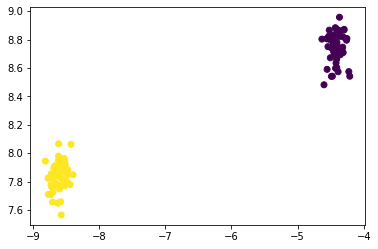

In [217]:
import matplotlib.pyplot as plt
from numpy.random import rand


fig, ax = plt.subplots()
ax.scatter(x=features[:,0], y=features[:,1], c=targets) 

plt.show()

In [222]:
 # make model and fit
model = KMeans(2)
model.fit(features)

In [218]:
from scipy.stats import multivariate_normal

In [224]:
means

array([[-9.27536505],
       [-5.82459676]])

In [228]:
multivariate_normal()

NameError: name 'log' is not defined

In [240]:
multivariate_normal(mean=np.array([0,0]), cov=np.array([[1,0],[0,1]])).logpdf(features)

array([-20.87813454, -21.42914933, -22.0462887 , -38.01463882,
       -20.16723205, -37.84066674, -37.8666099 , -39.40813209,
       -20.881594  , -37.80558984, -20.68157094, -19.73828819,
       -37.55850201, -20.04347252, -37.28612852, -20.97909451,
       -20.738748  , -37.09015696, -20.91329002, -37.64148419,
       -20.61039705, -21.76421353, -38.12123765, -38.13221327,
       -37.20509886, -37.60540728, -20.86984158, -20.2130931 ,
       -37.3914962 , -21.06865806, -20.33994155, -38.99333904,
       -37.07094772, -38.07697168, -21.1499733 , -20.17678684,
       -20.10860106, -39.06555479, -21.2153524 , -37.52193448,
       -38.69740178, -38.9111942 , -18.94243351, -19.86251698,
       -20.59344887, -21.4714526 , -37.66604789, -20.7046287 ,
       -36.65403645, -21.2251545 , -38.53754607, -38.33272679,
       -37.07992233, -20.64245955, -38.36201753, -20.57826068,
       -39.13564574, -37.56456672, -21.66999266, -36.02049506,
       -38.6956594 , -37.26506305, -21.00663148, -38.69

In [87]:
import numpy as np
from scipy.stats import multivariate_normal

def convert_to_diag(x):
    """Helped function to set all non-diagonal values in a matrix to 0."""
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            if i != j:
                x[i,j]=0
                
    return x

class GMM():
    def __init__(self, n_clusters, covariance_type):
        """
        This class implements a Gaussian Mixture Model updated using expectation
        maximization.

        A useful tutorial:
            https://campuspro-uploads.s3.us-west-2.amazonaws.com/63aa7cea-5e9c-4b62-96b7-8bbf3bc31b76/3a1d9101-8748-4e85-9830-4e45ffe1ca8d/EM%20derivations.pdf

        The EM algorithm for GMMs has two steps:

        1. Update posteriors (assignments to each Gaussian)
        2. Update Gaussian parameters (means, variances, and priors for each Gaussian)

        While you only have to implement the fit and predict functions to pass the
        test cases, we recommend that you break these two steps apart into separate
        functions. We have provided a template for you to put your code in.

        Use only numpy to implement this algorithm.

        This function MUST, after running 'fit', have variables named 'means' and
        'covariances' in order to pass the test cases. These variables are checked by the
        test cases to make sure you have recovered cluster parameters accurately.

        The fit and predict functions are implemented for you. To complete the implementation,
        you must implement:
            - _e_step
            - _m_step
            - _log_likelihood

        Args:
            n_clusters (int): Number of Gaussians to cluster the given data into.
            covariance_type (str): Either 'spherical', 'diagonal'. Determines the
                covariance type for the Gaussians in the mixture model.

        """
        self.n_clusters = n_clusters
        allowed_covariance_types = ['spherical', 'diagonal']
        if covariance_type not in allowed_covariance_types:
            raise ValueError(f'covariance_type must be in {allowed_covariance_types}')
        self.covariance_type = covariance_type

        self.means = None
        self.covariances = None
        self.mixing_weights = None
        self.max_iterations = 200

    def fit(self, features):
        """
        Fit GMM to the given data using `self.n_clusters` number of Gaussians.
        Features can have greater than 2 dimensions.

        Args:
            features (np.ndarray): array containing inputs of size
                (n_samples, n_features).
        Returns:
            None (saves model - means, covariances, and mixing weights - internally)
        """
        # 1. Use your KMeans implementation to initialize the means of the GMM.
        kmeans = KMeans(self.n_clusters)
        kmeans.fit(features)
        self.means = kmeans.means

        # 2. Initialize the covariance matrix and the mixing weights
        self.covariances = self._init_covariance(features.shape[-1])

        # 3. Initialize the mixing weights
        self.mixing_weights = np.random.rand(self.n_clusters)
        self.mixing_weights /= np.sum(self.mixing_weights)

        # 4. Compute log_likelihood under initial random covariance and KMeans means.
        prev_log_likelihood = -float('inf')
        log_likelihood = self._overall_log_likelihood(features)

        # 5. While the log_likelihood is increasing significantly, or max_iterations has
        # not been reached, continue EM until convergence.
        n_iter = 0
        while log_likelihood - prev_log_likelihood > 1e-4 and n_iter < self.max_iterations:
            prev_log_likelihood = log_likelihood

            assignments = self._e_step(features)
            self.means, self.covariances, self.mixing_weights = (
                self._m_step(features, assignments)
            )

            log_likelihood = self._overall_log_likelihood(features)
            n_iter += 1

        # Since self.covariances is assumed to have a certain shape, I need to reshape it in the end
        if self.covariance_type == 'spherical':
            # self.covariances is assumed to be a 1-D array of variances
            final_covariances = np.zeros(self.n_clusters)

            for index, covariance in enumerate(self.covariances):
                final_covariances[index] = np.mean(np.diagonal(covariance))

            self.covariances = final_covariances

        elif self.covariance_type == 'diagonal':
            # self.covariances is assumed to be a 2-D array 
            final_covariances = np.zeros((self.n_clusters, features.shape[-1]))

            for index, covariance in enumerate(self.covariances):
                final_covariances[index] = np.diagonal(covariance)

            self.covariances = final_covariances

    def predict(self, features):
        """
        Given features, an np.ndarray of size (n_samples, n_features), predict the label
        of each sample (e.g. the index of the Gaussian with the highest posterior for that
        sample).

        Args:
            features (np.ndarray): array containing inputs of size
                (n_samples, n_features).
        Returns:
            predictions (np.ndarray): predicted assigment to each cluster for each sample,
                of size (n_samples,). Each element is which cluster that sample belongs to.
        """
        posteriors = self._e_step(features)
        return np.argmax(posteriors, axis=-1)

    def _e_step(self, features):
        """
        The expectation step in Expectation-Maximization. Given the current class member
        variables self.mean, self.covariance, and self.mixing_weights:
            1. Calculate the log_likelihood of each point under each Gaussian.
            2. Calculate the posterior probability for each point under each Gaussian
            3. Return the posterior probability (assignments).
        
        This function should call your implementation of of _posterior which in turn calls 
        _log_likelihood (which should call
        multivariate_normal.logpdf). This should use the Gaussian parameter contained in
        self.means, self.covariance, and self.mixing_weights

        Arguments:
            features {np.ndarray} -- Features to apply means, covariance, and mixing_weights
                to.

        Returns:
            np.ndarray -- Posterior probabilities to each Gaussian (shape is
                (features.shape[0], self.n_clusters))
        """

        return np.array([self._posterior(features, j) for j in range(self.n_clusters)]).T

    def _m_step(self, features, assignments):
        """
        Maximization step in Expectation-Maximization. Given the current features and
        assignments, update self.means, self.covariances, and self.mixing_weights. Here,
        you implement the update equations for the means, covariances, and mixing weights.
            1. Update the means with the mu_j update in Slide 24.
            2. Update the mixing_weights with the w_j update in Slide 24
            3. Update the covariance matrix with the sigma_j update in Slide 24.

        Slide 24 is in these slides: 
            https://github.com/NUCS349/nucs349.github.io/blob/master/lectures/eecs349_gaussian_mixture_models.pdf

        NOTE: When updating the parameters of the Gaussian you always use the output of
        the E step taken before this M step (e.g. update the means, mixing_weights, and covariances 
        simultaneously).

        Arguments:
            features {np.ndarray} -- Features to update means and covariances, given the
                current assignments.
            assignments {np.ndarray} -- Soft assignments of each point to one of the cluster,
                given by _e_step.

        Returns:
            means -- Updated means
            covariances -- Updated covariances
            mixing_weights -- Updated mixing weights
        """

        # INITIALIZE the mixing_weights, means, and covariances
        
        # The mixing weights are scalars and their count = number of Gaussians
        mixing_weights = np.zeros(self.n_clusters)

        # The means are vectors of the same dimension as those in the features
        # Their count is equal to the number of Gaussian
        # The first number in the tuple below is the number of means (=n_clusters)
        # The second number is the dimensionality of the means, which is the same as that of the features
        means = np.zeros((self.n_clusters, features.shape[-1]))


        # Covariances
        # This will be a 3d array
        # The first dimension is the number of Covariance matrices (we have one per Gaussian)
        # The second & third dimensions will be the same, because each covariance matrix is square
        # The value of those dimensions is the dimensionality of the data
        covariances = np.zeros((self.n_clusters, features.shape[-1], features.shape[-1]))

        N  = features.shape[0] # Number of features is frequently used

        # Now, we have to update these parameters for EACH GAUSSIAN:

        for j in range(self.n_clusters):

            # First, we'll calculate GAMMA for this Gaussian, since it appears in all the calculations
            GAMMA = sum(assignments[:,j]) # sum of all the responsibilities of a given Gaussian for each of the points in features

            # Update the j-th mixing weight
            mixing_weights[j] = GAMMA / N

            # Update the j-th mean
            means[j] = sum([assignments[i,j]*features[i,:] for i in range(N) ]) / GAMMA

            # Calculate the j-th covariance matrix
            # The below is a bit complicated, but I am looking at page 9 of this: https://campuspro-uploads.s3.us-west-2.amazonaws.com/63aa7cea-5e9c-4b62-96b7-8bbf3bc31b76/3a1d9101-8748-4e85-9830-4e45ffe1ca8d/EM%20derivations.pdf
            # The .reshape(-1,1) and reshape(1,-1) is basically to make sure that the result of the dot product is a square matrix.
            # It's basically dot product of mean vector minus x vector and the transpose of the same
            cov_matrix_j = sum([ assignments[i,j]* np.dot( (self.means[j]-features[i,:]).reshape(-1,1), (self.means[j]-features[i,:]).reshape(1,-1) ) for i in range(N) ]) / GAMMA

            # If we are in the spherical case, then we should be able to just take the first element of the covariance matrix
            covariances[j] = convert_to_diag(cov_matrix_j)

        return means, covariances, mixing_weights

    def _init_covariance(self, n_features):
        """
        Initialize the covariance matrix given the covariance_type (spherical or
        diagonal). If spherical, each feature is treated the same (has equal covariance).
        If diagonal, each feature is treated independently (n_features covariances).

        Arguments:
            n_features {int} -- Number of features in the data for clustering

        Returns:
            [np.ndarray] -- Initial covariances (use np.random.rand)
        """
        if self.covariance_type == 'spherical':
            return np.random.rand(self.n_clusters)
        elif self.covariance_type == 'diagonal':
            return np.random.rand(self.n_clusters, n_features)

    def _log_likelihood(self, features, k_idx):
        """
        Compute the likelihood of the features given the index of the Gaussian
        in the mixture model. This function compute the log multivariate_normal
        distribution for features given the means and covariance of the ```k_idx```th
        Gaussian. To do this, you can use the function:

            scipy.stats.multivariate_normal.logpdf

        Read the documentation of this function to understand how it is used here:

            https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.multivariate_normal.html

        Once the raw likelihood is computed, incorporate the mixing_weights for the Gaussian
        via:

            log(mixing_weight) + logpdf

        Where logpdf is the output of multivariate_normal.

        Arguments:
            features {np.ndarray} -- Features to compute multivariate_normal distribution
                on.
            k_idx {int} -- Which Gaussian to use (e.g. use self.means[k_idx], 
                self.covariances[k_idx], self.mixing_weights[k_idx]).

        Returns:
            np.ndarray -- log likelihoods of each feature given a Gaussian.
        """

        log_pdf = multivariate_normal(mean=self.means[k_idx], cov=self.covariances[k_idx]).logpdf(features)

        return np.log(self.mixing_weights[k_idx]) + log_pdf


    def _overall_log_likelihood(self, features):

        denom = [
            self._log_likelihood(features, j) for j in range(self.n_clusters)
        ]
        return np.sum(denom)

    def _posterior(self, features, k):
        """
        Computes the posteriors given the log likelihoods for the GMM. Computes
        the posteriors for one of the Gaussians. To get all the posteriors, you have
        to iterate over this function. This function is implemented for you because the
        numerical issues can be tricky. We use the logsumexp trick to make it work (see
        below).

        Arguments:
            features {np.ndarray} -- Numpy array containing data (n_samples, n_features).
            k {int} -- Index of which Gaussian to compute posteriors for.

        Returns:
            np.ndarray -- Posterior probabilities for the selected Gaussian k, of size
                (n_samples,).
        """

        num = self._log_likelihood(features, k)

        denom = np.array([
            self._log_likelihood(features, j)
            for j in range(self.n_clusters)
        ])

        # Below is a useful function for safely computing large exponentials. It's a common
        # machine learning trick called the logsumexp trick:
        #   https://www.xarg.org/2016/06/the-log-sum-exp-trick-in-machine-learning/

        max_value = denom.max(axis=0, keepdims=True)
        denom_sum = max_value + np.log(np.sum(np.exp(denom - max_value), axis=0))
        posteriors = np.exp(num - denom_sum)
        return np.squeeze(posteriors)


In [22]:
features, targets = generate_cluster_data(n_samples=100, n_features=2, cluster_stds=.1, n_centers=2)

In [23]:
c=2

In [24]:
# try spherical
covariance_type = 'spherical'

model = GMM(c, covariance_type=covariance_type)
model.fit(features)

CALLING _OVERALL_LOG_LIKELIHOOD
CALLING _LOG_LIKELIHOOD
K_IDX= 0
SELF.COVARIANCES = [0.45303353 0.34875415]
SELF.COVARIANCES[k_idx]= 0.45303352899867877
CALLING _LOG_LIKELIHOOD
K_IDX= 1
SELF.COVARIANCES = [0.45303353 0.34875415]
SELF.COVARIANCES[k_idx]= 0.3487541516085212
FINISHED CALCULATING _OVERALL_LOG_LIKELIHOOD UNDER INIITAL RANDOM
NUMBER OF ITERATION: 0
STARTING EXPECTATION STEP
CALLING _POSTERIOR
CALCULATING NUMERATOR
CALLING _LOG_LIKELIHOOD
K_IDX= 0
SELF.COVARIANCES = [0.45303353 0.34875415]
SELF.COVARIANCES[k_idx]= 0.45303352899867877
CALCULATING DENOMINATOR
CALLING _LOG_LIKELIHOOD
K_IDX= 0
SELF.COVARIANCES = [0.45303353 0.34875415]
SELF.COVARIANCES[k_idx]= 0.45303352899867877
CALLING _LOG_LIKELIHOOD
K_IDX= 1
SELF.COVARIANCES = [0.45303353 0.34875415]
SELF.COVARIANCES[k_idx]= 0.3487541516085212
CALLING _POSTERIOR
CALCULATING NUMERATOR
CALLING _LOG_LIKELIHOOD
K_IDX= 1
SELF.COVARIANCES = [0.45303353 0.34875415]
SELF.COVARIANCES[k_idx]= 0.3487541516085212
CALCULATING DENOMINATOR


In [32]:
cov0 = model.covariances[0]; cov0

array([[0.00939724, 0.        ],
       [0.        , 0.00870454]])

In [29]:
for cov in model.covariances:
    print(np.sqrt(cov))
    print(np.sqrt(cov)-.1)

[[0.09693935 0.        ]
 [0.         0.09329811]]
[[-0.00306065 -0.1       ]
 [-0.1        -0.00670189]]
[[0.09987148 0.        ]
 [0.         0.0907456 ]]
[[-0.00012852 -0.1       ]
 [-0.1        -0.0092544 ]]


In [33]:
np.mean(np.diagonal(cov0))

0.009050887405803332

In [34]:
for index, cov in enumerate(model.covariances):
    print(index)
    print(cov)

0
[[0.00939724 0.        ]
 [0.         0.00870454]]
1
[[0.00997431 0.        ]
 [0.         0.00823476]]


# MNIST

In [47]:
import os, struct
from array import array as pyarray
from numpy import append, array, int8, uint8, zeros

def load_mnist(dataset="training", digits=None, path=None, asbytes=False, selection=None, return_labels=True, return_indices=False):
    """
    Loads MNIST files into a 3D numpy array.

    You have to download the data separately from [MNIST]_. Use the ``path`` parameter
    to specify the directory that contains all four downloaded MNIST files.

    Parameters
    ----------
    dataset : str
        Either "training" or "testing", depending on which dataset you want to
        load.
    digits : list
        Integer list of digits to load. The entire database is loaded if set to
        ``None``. Default is ``None``.
    path : str
        Path to your MNIST datafiles. The default is ``None``, which will try
        to take the path from your environment variable ``MNIST``. The data can
        be downloaded from http://yann.lecun.com/exdb/mnist/.
    asbytes : bool
        If True, returns data as ``numpy.uint8`` in [0, 255] as opposed to
        ``numpy.float64`` in [0.0, 1.0].
    selection : slice
        Using a `slice` object, specify what subset of the dataset to load. An
        example is ``slice(0, 20, 2)``, which would load every other digit
        until--but not including--the twentieth.
    return_labels : bool
        Specify whether or not labels should be returned. This is also a speed
        performance if digits are not specified, since then the labels file
        does not need to be read at all.
    return_indicies : bool
        Specify whether or not to return the MNIST indices that were fetched.
        This is valuable only if digits is specified, because in that case it
        can be valuable to know how far
        in the database it reached.

    Returns
    -------
    images : ndarray
        Image data of shape ``(N, rows, cols)``, where ``N`` is the number of images. If neither labels nor inices are returned, then this is returned directly, and not inside a 1-sized tuple.
    labels : ndarray
        Array of size ``N`` describing the labels. Returned only if ``return_labels`` is `True`, which is default.
    indices : ndarray
        The indices in the database that were returned.

    Examples
    --------
    Assuming that you have downloaded the MNIST database and set the
    environment variable ``$MNIST`` point to the folder, this will load all
    images and labels from the training set:

    >>> images, labels = ag.io.load_mnist('training') # doctest: +SKIP

    Load 100 sevens from the testing set:

    >>> sevens = ag.io.load_mnist('testing', digits=[7], selection=slice(0, 100), return_labels=False) # doctest: +SKIP

    """

    # The files are assumed to have these names and should be found in 'path'
    files = {
        'training': ('train-images-idx3-ubyte', 'train-labels-idx1-ubyte'),
        'testing': ('t10k-images-idx3-ubyte', 't10k-labels-idx1-ubyte'),
    }

    if path is None:
        try:
            path = os.environ['MNIST']
        except KeyError:
            raise ValueError("Unspecified path requires environment variable $MNIST to be set")

    try:
        images_fname = os.path.join(path, files[dataset][0])
        labels_fname = os.path.join(path, files[dataset][1])
    except KeyError:
        raise ValueError("Data set must be 'testing' or 'training'")

    # We can skip the labels file only if digits aren't specified and labels aren't asked for
    if return_labels or digits is not None:
        flbl = open(labels_fname, 'rb')
        magic_nr, size = struct.unpack(">II", flbl.read(8))
        labels_raw = pyarray("b", flbl.read())
        flbl.close()

    fimg = open(images_fname, 'rb')
    magic_nr, size, rows, cols = struct.unpack(">IIII", fimg.read(16))
    images_raw = pyarray("B", fimg.read())
    fimg.close()

    if digits:
        indices = [k for k in range(size) if labels_raw[k] in digits]
    else:
        indices = range(size)

    if selection:
        indices = indices[selection]
    N = len(indices)

    images = zeros((N, rows, cols), dtype=uint8)

    if return_labels:
        labels = zeros((N), dtype=int8)
    for i, index in enumerate(indices):
        images[i] = array(images_raw[ indices[i]*rows*cols : (indices[i]+1)*rows*cols ]).reshape((rows, cols))
        if return_labels:
            labels[i] = labels_raw[indices[i]]

    if not asbytes:
        images = images.astype(float)/255.0

    ret = (images,)
    if return_labels:
        ret += (labels,)
    if return_indices:
        ret += (indices,)
    if len(ret) == 1:
        return ret[0] # Don't return a tuple of one
    else:
        return ret


In [50]:
images, labels = load_mnist(path='mnist', dataset='testing')

In [55]:
images[0].shape

(28, 28)

In [57]:
np.unique(labels, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int8),
 array([ 980, 1135, 1032, 1010,  982,  892,  958, 1028,  974, 1009]))

In [58]:
import pandas as pd

In [61]:
pd.Series(labels).value_counts()

1    1135
2    1032
7    1028
3    1010
9    1009
4     982
0     980
8     974
6     958
5     892
dtype: int64

In [62]:
min_count = 892

In [141]:
# Load all digits; number for each equal to the minority class (digit "5" with 892 counts)
ones, ones_labels = load_mnist(path='mnist', dataset='testing', digits=[1], selection=slice(0, min_count), return_labels=True)
twos, twos_labels = load_mnist(path='mnist', dataset='testing', digits=[2], selection=slice(0, min_count), return_labels=True)
threes, threes_labels = load_mnist(path='mnist', dataset='testing', digits=[3], selection=slice(0, min_count), return_labels=True)
fours, fours_labels = load_mnist(path='mnist', dataset='testing', digits=[4], selection=slice(0, min_count), return_labels=True)
fives, fives_labels = load_mnist(path='mnist', dataset='testing', digits=[5], selection=slice(0, min_count), return_labels=True)
sixs, sixs_labels = load_mnist(path='mnist', dataset='testing', digits=[6], selection=slice(0, min_count), return_labels=True)
sevens, sevens_labels = load_mnist(path='mnist', dataset='testing', digits=[7], selection=slice(0, min_count), return_labels=True)
eights, eights_labels = load_mnist(path='mnist', dataset='testing', digits=[8], selection=slice(0, min_count), return_labels=True)
nines, nines_labels = load_mnist(path='mnist', dataset='testing', digits=[9], selection=slice(0, min_count), return_labels=True)
zeroes, zeroes_labels = load_mnist(path='mnist', dataset='testing', digits=[0], selection=slice(0, min_count), return_labels=True)

In [142]:
# Reshaping i.e. flattening to 1-D array each digit
ones = ones.reshape(min_count, -1)
twos = twos.reshape(min_count, -1)
threes = threes.reshape(min_count, -1)
fours = fours.reshape(min_count, -1)
fives = fives.reshape(min_count, -1)
sixs = sixs.reshape(min_count, -1)
sevens = sevens.reshape(min_count, -1)
eights = eights.reshape(min_count, -1)
nines = nines.reshape(min_count, -1)
zeroes = zeroes.reshape(min_count, -1)

In [143]:
# Put all the digits in one features array
digits = np.concatenate((ones, twos, threes, fours, fives, sixs, sevens, eights, nines, zeroes))
digits_labels = np.concatenate((ones_labels, twos_labels, threes_labels, fours_labels, fives_labels, sixs_labels, sevens_labels, eights_labels, nines_labels, zeroes_labels))

In [130]:
# TOO SLOW :/
# kmeans = KMeans(10)
# kmeans.fit(digits)

In [140]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import adjusted_mutual_info_score

In [138]:
kmeans = KMeans(n_clusters=10)
kmeans.fit(digits)

KMeans(n_clusters=10)

In [148]:
kmeans_pred = kmeans.predict(digits); kmeans_pred

array([9, 9, 5, ..., 6, 4, 6], dtype=int32)

In [139]:
gmm = GaussianMixture(n_components=10)
gmm.fit(digits)

GaussianMixture(n_components=10)

In [150]:
gmm_pred = gmm.predict(digits); gmm_pred

array([1, 1, 1, ..., 2, 2, 7])

In [151]:
adjusted_mutual_info_score(digits_labels, kmeans_pred)

0.4920112724999069

In [152]:
adjusted_mutual_info_score(digits_labels, gmm_pred)

0.5445894986455011

## Part 2 Comparing approaches with labels

In [186]:
weighted_accuracy = 0
total_counts = 0

for cluster_value in range(10):
    values_counts = np.unique(digits_labels[gmm_pred == cluster_value], return_counts=True)
    values = values_counts[0]
    counts = values_counts[1]
    tuples = sorted(list(zip(values, counts)), key = lambda x: x[1], reverse=True) ; 
    print(tuples)
    print("MOST COMMON LABEL IN THIS CLUSTER: ",tuples[0][1])
    print("TOTAL NUMBER OF OBSERVATIONS IN THIS CLUSTER: ", sum(counts))
    print("PROPORTION ACCURACY: ", tuples[0][1]/sum(counts))
    weighted_accuracy += tuples[0][1]
    total_counts += sum(counts)

[(2, 634), (3, 39), (7, 11), (6, 9), (8, 8), (5, 6), (0, 3), (1, 2), (4, 2), (9, 2)]
MOST COMMON LABEL IN THIS CLUSTER:  634
TOTAL NUMBER OF OBSERVATIONS IN THIS CLUSTER:  716
PROPORTION ACCURACY:  0.8854748603351955
[(1, 783), (2, 84), (5, 62), (6, 36), (7, 30), (8, 20), (3, 17), (4, 12), (9, 5), (0, 3)]
MOST COMMON LABEL IN THIS CLUSTER:  783
TOTAL NUMBER OF OBSERVATIONS IN THIS CLUSTER:  1052
PROPORTION ACCURACY:  0.7442965779467681
[(0, 359), (6, 41), (5, 15), (8, 8), (9, 6), (4, 4), (2, 2), (3, 1), (7, 1)]
MOST COMMON LABEL IN THIS CLUSTER:  359
TOTAL NUMBER OF OBSERVATIONS IN THIS CLUSTER:  437
PROPORTION ACCURACY:  0.8215102974828375
[(7, 645), (9, 32), (2, 18), (8, 14), (3, 8), (5, 4), (0, 1)]
MOST COMMON LABEL IN THIS CLUSTER:  645
TOTAL NUMBER OF OBSERVATIONS IN THIS CLUSTER:  722
PROPORTION ACCURACY:  0.8933518005540166
[(3, 478), (5, 191), (8, 108), (2, 48), (0, 23), (6, 5), (1, 4), (9, 3), (7, 1)]
MOST COMMON LABEL IN THIS CLUSTER:  478
TOTAL NUMBER OF OBSERVATIONS IN THIS

In [187]:
total_counts

8920

In [188]:
weighted_accuracy/total_counts

0.6257847533632287

In [174]:
value = 0
values_counts = np.unique(digits_labels[kmeans_pred == value], return_counts=True)
values = values_counts[0]
counts = values_counts[1]
tuples = sorted(list(zip(values, counts)), key = lambda x: x[1], reverse=True) ; tuples
print(tuples[0][0])


2


## Visualizing

### METHOD 1 - Visualizing Mean

In [231]:
def euclidean_distance(v, w):
    """Returns the Euclidean distance between two vectors"""

    return math.sqrt(sum([(v[ii]-w[ii])**2 for ii in range(len(v))]))

def euclidean_distances(X, Y):
    """Compute pairwise Euclidean distance between the rows of two matrices X (shape MxK) 
    and Y (shape NxK). The output of this function is a matrix of shape MxN containing
    the Euclidean distance between two rows.
    
    Arguments:
        X {np.ndarray} -- First matrix, containing M examples with K features each.
        Y {np.ndarray} -- Second matrix, containing N examples with K features each.

    Returns:
        D {np.ndarray}: MxN matrix with Euclidean distances between rows of X and rows of Y.
    """
    
    result = np.ndarray((X.shape[0], Y.shape[0]))
    
    for ii in range(X.shape[0]):
        for kk in range(Y.shape[0]):
            
            result[ii,kk] = euclidean_distance(X[ii], Y[kk])
    
    return result

In [268]:
majority_labels = [2,1,0,7,3,8,9,0,4,6]

for cluster_value in range(10):
    cluster_digits = digits[gmm_pred == cluster_value,:];
    cluster_mean = np.mean(cluster_digits, axis=0)
    cluster_mean = cluster_mean.reshape(28,28)
    img = Image.fromarray(np.uint8(cluster_mean*255), 'L')
    img.save(f'cluster_value_{majority_labels[cluster_value]}.png')

In [269]:
for cluster_value in range(10):
    cluster_digits = digits[gmm_pred == cluster_value,:]; cluster_digits.shape
    cluster_mean = np.mean(cluster_digits, axis=0);
    cluster_mean = cluster_mean.reshape(1,-1)
    distances = euclidean_distances(cluster_digits, cluster_mean)
    closest_neighbour = cluster_digits[np.argmin(distances),:]
    closest_neighbour = closest_neighbour.reshape(28,28)
    img = Image.fromarray(np.uint8(closest_neighbour*255), 'L')
    img.save(f'closest_neighbour_{majority_labels[cluster_value]}.png')

# Bonus

In [275]:
# I will take all the 2s
all_twos = load_mnist(path='mnist', dataset='testing', digits=[2], selection=slice(0, 1032), return_labels=False)

In [276]:
all_twos.shape

(1032, 28, 28)

In [277]:
all_twos = all_twos.reshape(1032, -1); all_twos.shape

(1032, 784)

In [290]:
# Instantiate and fit models
gmm_1 = GaussianMixture(n_components=1)
gmm_4 = GaussianMixture(n_components=4)
gmm_10 = GaussianMixture(n_components=10)
gmm_20 = GaussianMixture(n_components=20)
gmm_50 = GaussianMixture(n_components=50)
gmm_1.fit(all_twos)
gmm_4.fit(all_twos)
gmm_10.fit(all_twos)
gmm_20.fit(all_twos)
gmm_50.fit(all_twos)

GaussianMixture(n_components=50)

In [291]:
gmm_1_samples = gmm_1.sample(5)[0]
gmm_4_samples = gmm_4.sample(5)[0]
gmm_10_samples = gmm_10.sample(5)[0]
gmm_20_samples = gmm_20.sample(5)[0]
gmm_50_samples = gmm_50.sample(5)[0]

In [292]:
gmm_1_samples = gmm_1_samples.reshape(5,28,28)
gmm_4_samples = gmm_4_samples.reshape(5,28,28)
gmm_10_samples = gmm_10_samples.reshape(5,28,28)
gmm_20_samples = gmm_20_samples.reshape(5,28,28)
gmm_50_samples = gmm_50_samples.reshape(5,28,28)

In [293]:
for index, arr in enumerate(gmm_1_samples):
    img = Image.fromarray(np.uint8(arr*255), 'L')
    img.save(f'gmm_1_{index}.png')
    
for index, arr in enumerate(gmm_4_samples):
    img = Image.fromarray(np.uint8(arr*255), 'L')
    img.save(f'gmm_4_{index}.png')
    
for index, arr in enumerate(gmm_10_samples):
    img = Image.fromarray(np.uint8(arr*255), 'L')
    img.save(f'gmm_10_{index}.png')
    
for index, arr in enumerate(gmm_20_samples):
    img = Image.fromarray(np.uint8(arr*255), 'L')
    img.save(f'gmm_20_{index}.png')
    
for index, arr in enumerate(gmm_50_samples):
    img = Image.fromarray(np.uint8(arr*255), 'L')
    img.save(f'gmm_50_{index}.png')

# APPENDIX

In [348]:
cov1 = np.array([[1,0],[0,1]]); print(cov1)
cov2 = np.array([[2,0],[0,2]]); print(cov2)
cov3 = np.array([[3,0],[0,3]]); print(cov3)

array_of_cov = np.array([cov1, cov2, cov3]); array_of_cov

[[1 0]
 [0 1]]
[[2 0]
 [0 2]]
[[3 0]
 [0 3]]


array([[[1, 0],
        [0, 1]],

       [[2, 0],
        [0, 2]],

       [[3, 0],
        [0, 3]]])

In [18]:
def convert_to_diag(x):
    
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            if i != j:
                x[i,j]=0
                
    return x

In [19]:
cov1

array([[0.01031506, 0.        ],
       [0.        , 0.01070544]])

In [20]:
cov1

array([[0.01031506, 0.        ],
       [0.        , 0.01070544]])

In [17]:
convert_to_diag(cov1)

In [366]:
np.dot(v.reshape(-1,1), v.reshape(1,-1))

array([[1, 2, 3],
       [2, 4, 6],
       [3, 6, 9]])

In [372]:
np.dot((v-w).reshape(-1,1), (v-w).reshape(1,-1))

array([[9, 9, 9],
       [9, 9, 9],
       [9, 9, 9]])

In [367]:
v = np.array([1,2,3])
w = np.array([4,5,6])
np.dot(v.T, v)

14

In [357]:
np.zeros((5, features.shape[-1], features.shape[-1]))

array([[[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]]])

In [257]:
assignments = np.array([[[1.21961890e-42, 1.00000000e+00 ,1.00000000e+00 ,1.00000000e+00,
   3.64109720e-41, 1.00000000e+00, 1.00000000e+00, 3.74421045e-41,
   4.87806565e-41, 1.45958336e-40, 1.00000000e+00, 1.00000000e+00,
   4.26006989e-41, 1.00000000e+00, 1.00000000e+00, 3.17551087e-42,
   1.00000000e+00, 9.57973014e-42, 4.25792685e-42, 1.00000000e+00,
   1.00000000e+00, 2.09756900e-41, 3.01459744e-41, 1.00000000e+00,
   1.00000000e+00, 3.80978654e-42, 1.40268657e-40, 1.00000000e+00,
   1.00000000e+00, 1.00000000e+00, 3.71658618e-41, 1.62517789e-41,
   8.64416847e-42, 1.00000000e+00, 1.00000000e+00, 1.70475662e-42,
   8.93523471e-42, 1.00000000e+00, 2.85155218e-41, 1.00000000e+00,
   1.47889899e-41, 1.07193063e-40 ,8.05744808e-43 ,1.27125030e-40,
   7.56737129e-42, 1.00000000e+00 ,5.64624347e-41 ,1.00000000e+00,
   1.00000000e+00, 1.00000000e+00 ,9.76127495e-42 ,1.00000000e+00,
   1.00000000e+00, 9.76628231e-41, 1.00000000e+00, 1.00000000e+00,
   1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 2.43331062e-41,
   1.00000000e+00, 1.49012901e-40, 8.78488390e-42, 1.00000000e+00,
   2.69950682e-41, 2.63120784e-41, 1.00000000e+00, 1.00000000e+00,
   1.00000000e+00, 1.00000000e+00 ,1.00000000e+00, 1.61649630e-42,
   2.40472860e-41, 2.19837867e-41 ,7.36717651e-41, 3.71782922e-41,
   1.00000000e+00, 1.04890778e-42 ,3.82693869e-41, 1.00000000e+00,
   1.00000000e+00, 1.29462646e-42 ,1.73631066e-41, 4.17001364e-42,
   1.00000000e+00, 1.63493222e-41 ,1.41022234e-41 ,1.48114241e-42,
   1.00000000e+00, 1.00000000e+00 ,2.64987929e-41, 4.62333192e-42,
   1.00000000e+00, 3.05530655e-42 ,1.00000000e+00, 3.08212318e-41,
   1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 8.91698359e-42,]],

 [[1.00000000e+00, 2.78271783e-43, 2.02018793e-42, 4.34626054e-43,
   1.00000000e+00, 3.85261403e-42, 5.51141032e-43, 1.00000000e+00,
   1.00000000e+00, 1.00000000e+00, 1.22548705e-43, 8.21242211e-44,
   1.00000000e+00, 8.94371949e-43, 2.62672872e-44, 1.00000000e+00,
   3.20165586e-43, 1.00000000e+00, 1.00000000e+00, 6.34215241e-43,
   1.86760186e-42, 1.00000000e+00, 1.00000000e+00, 5.07054323e-43,
   4.34270002e-42, 1.00000000e+00, 1.00000000e+00, 8.32453352e-43,
   1.75272807e-43, 8.16890915e-44, 1.00000000e+00, 1.00000000e+00,
   1.00000000e+00, 6.56011169e-42, 5.53140023e-43, 1.00000000e+00,
   1.00000000e+00 ,1.15123579e-42, 1.00000000e+00, 2.31744221e-43,
   1.00000000e+00 ,1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
   1.00000000e+00 ,4.81599640e-43, 1.00000000e+00, 6.00548795e-43,
   6.76975603e-43, 2.89241589e-42, 1.00000000e+00, 1.80452371e-42,
   4.91054468e-43, 1.00000000e+00, 2.02993415e-41, 2.63147335e-42,
   3.34141148e-43, 3.81143296e-44, 9.29447183e-42, 1.00000000e+00,
   1.02679591e-43, 1.00000000e+00, 1.00000000e+00, 1.10244580e-42,
   1.00000000e+00, 1.00000000e+00, 1.16915424e-42, 2.75953275e-42,
   7.65203746e-43, 1.73554181e-43, 1.03698828e-41, 1.00000000e+00,
   1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
   6.88048219e-42, 1.00000000e+00, 1.00000000e+00, 3.93334887e-42,
   1.85089884e-42, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
   4.70978256e-43, 1.00000000e+00 ,1.00000000e+00, 1.00000000e+00,
   1.49685829e-42, 5.44502878e-42 ,1.00000000e+00, 1.00000000e+00,
   5.39553426e-43, 1.00000000e+00 ,2.36988071e-42, 1.00000000e+00,
   3.94045528e-43, 1.86503845e-42 ,4.22258402e-44, 1.00000000e+00]]])